In [22]:
import requests 
import pandas as pd
from bs4 import BeautifulSoup
import folium
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
url = 'https://www.worldometers.info/coronavirus/#countries'
html = requests.get(url).content

In [3]:
soup = BeautifulSoup(html,'lxml')


In [4]:
table = soup.find('table', id="main_table_countries")
rows = table.find_all('tr')


In [5]:
parsed_data = []

In [6]:
for country in rows:
    parsed_data.append([data.get_text() for data in country.findAll("td")])

In [7]:
COLUMNS = ['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 'Active Cases', 'Critical Cases', 'Tot Cases/1M pop']

In [8]:
data = pd.DataFrame(parsed_data[1:], columns = COLUMNS)

In [9]:
data = data.apply(lambda x: x.str.replace(' ',''))
data = data.apply(lambda x: x.str.replace(',',''))
data = data.apply(lambda x: x.str.replace('.',''))
data = data.apply(lambda x: x.str.replace('+',''))


In [10]:
data.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot Cases/1M pop
0,China,80815,22,3177,8,64152,13486,4020,561
1,Italy,17660,2547,1266,250,1439,14955,1328,2921
2,Iran,11364,1289,514,85,3529,7321,,1353
3,SKorea,7979,110,71,5,510,7398,93,1556
4,Spain,4334,1188,122,36,193,4019,190,927


In [11]:
data.drop(data.tail(1).index,inplace=True)
data.replace('',0, inplace=True)

In [12]:
data.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot Cases/1M pop
0,China,80815,22,3177,8,64152,13486,4020,561
1,Italy,17660,2547,1266,250,1439,14955,1328,2921
2,Iran,11364,1289,514,85,3529,7321,0,1353
3,SKorea,7979,110,71,5,510,7398,93,1556
4,Spain,4334,1188,122,36,193,4019,190,927


In [26]:
data.describe()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot Cases/1M pop
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,1044.043478,69.000000,39.108696,3.065217,513.913043,491.021739,43.405797,161.731884
std,7118.466014,280.889749,293.208993,22.636192,5466.554423,1971.812733,359.804542,407.339535
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.250000
50%,21.000000,2.500000,0.000000,0.000000,0.000000,19.000000,0.000000,7.500000
75%,97.500000,15.250000,1.000000,0.000000,3.750000,80.500000,1.000000,74.250000
max,80815.000000,2547.000000,3177.000000,250.000000,64152.000000,14955.000000,4020.000000,2921.000000


In [41]:
Q1 = data.quantile(0.25)
print('--------------Q1--------------')
print(Q1)
Q3 = data.quantile(0.75)
print('--------------Q3--------------')
print (Q3)
print('--------------IQR--------------')
IQR = Q3 - Q1
print(IQR)

--------------Q1--------------
Total Cases         3.00
New Cases           0.00
Total Deaths        0.00
New Deaths          0.00
Total Recovered     0.00
Active Cases        3.00
Critical Cases      0.00
Tot Cases/1M pop    0.25
Name: 0.25, dtype: float64
--------------Q3--------------
Total Cases         97.50
New Cases           15.25
Total Deaths         1.00
New Deaths           0.00
Total Recovered      3.75
Active Cases        80.50
Critical Cases       1.00
Tot Cases/1M pop    74.25
Name: 0.75, dtype: float64
--------------IQR--------------
Total Cases         94.50
New Cases           15.25
Total Deaths         1.00
New Deaths           0.00
Total Recovered      3.75
Active Cases        77.50
Critical Cases       1.00
Tot Cases/1M pop    74.00
dtype: float64


In [47]:
Q3['Total Cases'] + 1.5 * IQR['Total Cases']

239.25

In [48]:
data_Total_Cases = data[data['Total Cases'] > Q3['Total Cases'] + 1.5 * IQR['Total Cases']]

In [49]:
data_Total_Cases

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot Cases/1M pop
0,China,80815,22,3177,8,64152,13486,4020,561
1,Italy,17660,2547,1266,250,1439,14955,1328,2921
2,Iran,11364,1289,514,85,3529,7321,0,1353
3,SKorea,7979,110,71,5,510,7398,93,1556
4,Spain,4334,1188,122,36,193,4019,190,927
5,Germany,3675,930,8,2,46,3621,9,439
6,France,3661,785,79,18,12,3570,154,561
7,USA,2053,356,41,0,31,1981,10,62
8,Switzerland,1139,271,11,4,4,1124,0,1316
9,Norway,958,158,1,0,1,956,27,1767


-999

In [50]:
list_numeric = ['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 'Active Cases', 'Critical Cases', 'Tot Cases/1M pop']

In [51]:
data_Total_Cases[list_numeric] = data[list_numeric].astype(int)

/home/jacoboespinosa/miniconda3/envs/basico/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [52]:
zscore_data = data.iloc[:, 1:10][(np.abs(stats.zscore(data.iloc[:, 1:10])) < 3).all(axis=1)] 
#For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation. 
#Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold. .all(axis=1) ensures that for each row, all column satisfy the constraint. 
#Finally, result of this condition is used to index the dataframe.
#https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

In [53]:
zscore_data.head()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot Cases/1M pop
6,3661,785,79,18,12,3570,154,561
7,2053,356,41,0,31,1981,10,62
8,1139,271,11,4,4,1124,0,1316
10,814,127,1,0,1,812,2,806
11,804,190,10,5,2,792,1,469


In [17]:
processed_data = pd.concat([data['Country'], zscore_data], join="inner", axis=1)

In [18]:
processed_data

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot Cases/1M pop
6,France,3661,785,79,18,12,3570,154,561
7,USA,2053,356,41,0,31,1981,10,62
8,Switzerland,1139,271,11,4,4,1124,0,1316
10,Sweden,814,127,1,0,1,812,2,806
11,Netherlands,804,190,10,5,2,792,1,469
...,...,...,...,...,...,...,...,...,...
133,Mongolia,1,0,0,0,0,1,0,3
134,StBarth,1,0,0,0,0,1,0,0
135,StVincentGrenadines,1,0,0,0,0,1,0,0
136,Togo,1,0,0,0,0,1,0,1


In [19]:
country_geo = 'world-countries.json'

In [ ]:
# Setup a folium map at a high-level zoom
mapa = folium.Map(location=[0, 0], zoom_start=2.5)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
mapa.choropleth(geo_data=country_geo, 
                data=processed_data,
                columns=['Country', 'Total Cases'],
                key_on='feature.properties.name',
                fill_color='YlOrRd',
                fill_opacity=0.7,
                line_opacity=0.2)

In [ ]:
mapa

In [ ]:
threshold_scale_cases = np.linspace(processed_data['Total Cases'].min(), #creating bins (6)
                            processed_data['Total Cases'].max(),
                            6, dtype=int)
threshold_scale_cases = threshold_scale_cases.tolist()
threshold_scale_cases[-1] = threshold_scale_cases[-1] + 1

In [ ]:
# Setup a folium map at a high-level zoom
mapa = folium.Map(location=[0, 0], zoom_start=2.5)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
mapa.choropleth(geo_data=country_geo, 
                data=processed_data,
                columns=['Country', 'Total Cases'],
                key_on='feature.properties.name',
                threshold_scale=threshold_scale_cases,
                fill_color='YlOrRd',
                fill_opacity=0.7,
                line_opacity=0.2,
                legend_name='Total Cases CoronaVirus',
                reset=True)

In [ ]:
mapa

In [ ]:
threshold_scale_total_deaths = np.linspace(data[1:]['Total Cases'].min(), #creating bins (6)
                            data[1:]['Total Cases'].max(),
                            6, dtype=int)
threshold_scale_total_deaths = threshold_scale_total_deaths.tolist()
threshold_scale_total_deaths[-1] = threshold_scale_total_deaths[-1] + 1

In [ ]:
threshold_scale_total_deaths

In [ ]:
data[1:]

In [20]:
data['Total Cases'].dropna(inplace=True)

In [21]:
data

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot Cases/1M pop
0,China,80815,22,3177,8,64152,13486,4020,561
1,Italy,17660,2547,1266,250,1439,14955,1328,2921
2,Iran,11364,1289,514,85,3529,7321,0,1353
3,SKorea,7979,110,71,5,510,7398,93,1556
4,Spain,4334,1188,122,36,193,4019,190,927
...,...,...,...,...,...,...,...,...,...
133,Mongolia,1,0,0,0,0,1,0,3
134,StBarth,1,0,0,0,0,1,0,0
135,StVincentGrenadines,1,0,0,0,0,1,0,0
136,Togo,1,0,0,0,0,1,0,1


In [ ]:
ax = data['Total Cases'].plot.kde()

In [ ]:
hist = data['Total Cases'].hist(bins=120)

In [ ]:
# Setup a folium map at a high-level zoom
mapa = folium.Map(location=[0, 0], zoom_start=2.5)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
mapa.choropleth(geo_data=country_geo, 
                data=data[1:],
                columns=['Country', 'Total Cases'],
                key_on='feature.properties.name',
                threshold_scale=threshold_scale_total_deaths,
                fill_color='YlOrRd',
                fill_opacity=0.7,
                line_opacity=0.2,
                legend_name='Total Cases CoronaVirus',
                reset=True)

In [ ]:
mapa

Text(0, 0.5, 'Casos')

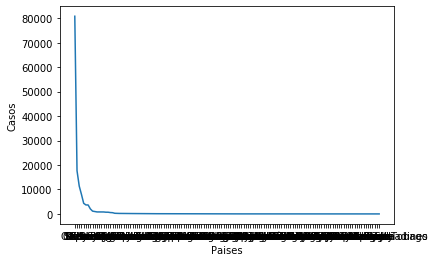

In [25]:
plt.plot(data['Country'], data['Total Cases'])
plt.xlabel('Paises')
plt.ylabel('Casos')